In [43]:
import os
import sys

path = os.getcwd().replace('\\notebooks', '')
script_path = os.path.join(path, 'utils')

sys.path.append(script_path)

from preprocess import *


In [44]:
train_data = get_data('processed_data', 'processed_train.csv')

games_data = get_data('main_data', 'games.csv')
games_data.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [45]:
games_data.shape

(72773, 12)

In [46]:
train_data.head()

,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating
0,1,stevy,429,BetterBot,335,1637,1500
1,3,davidavid,440,BetterBot,318,2071,1811
2,4,Inandoutworker,119,BetterBot,478,1936,1473
3,5,stevy,325,STEEBot,427,1844,1500
4,6,HivinD,378,STEEBot,427,2143,2029


In [47]:
train_data.shape

(50410, 7)

In [48]:
full_train = train_data.join(games_data.set_index('game_id'), on='game_id')

full_train.head()

,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,stevy,429,BetterBot,335,1637,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,3,davidavid,440,BetterBot,318,2071,1811,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
2,4,Inandoutworker,119,BetterBot,478,1936,1473,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
3,5,stevy,325,STEEBot,427,1844,1500,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
4,6,HivinD,378,STEEBot,427,2143,2029,HivinD,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541


In [49]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   game_id                50410 non-null  int64         
 1   nickname               50410 non-null  object        
 2   score                  50410 non-null  int64         
 3   bot_nickname           50410 non-null  object        
 4   bot_score              50410 non-null  int64         
 5   bot_rating             50410 non-null  int64         
 6   rating                 50410 non-null  int64         
 7   first                  50410 non-null  object        
 8   time_control_name      50410 non-null  object        
 9   game_end_reason        50410 non-null  object        
 10  winner                 50410 non-null  int64         
 11  created_at             50410 non-null  datetime64[ns]
 12  lexicon                50410 non-null  object        
 13  i

# feature engineering

We saw earlier in the baseline.ipynb notebook that there are 59 unique days of games played with most games seem to have been played during September 2022. The date seem less important than the time of the game played or the day of the week, since we are trying to generalize rather than predict for a specific date.

In [50]:
full_train['game_created_time'] = games_data.created_at.dt.time
#full_train['game_created_date'] = games_data.created_at.dt.date
full_train['game_created_day'] = games_data.created_at.dt.strftime('%A')

full_train.drop(columns = 'created_at', inplace = True)

full_train.head()

,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,game_created_time,game_created_day
0,1,stevy,429,BetterBot,335,1637,1500,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,03:38:49,Friday
1,3,davidavid,440,BetterBot,318,2071,1811,BetterBot,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,19:19:59,Wednesday
2,4,Inandoutworker,119,BetterBot,478,1936,1473,BetterBot,regular,RESIGNED,0,CSW21,3600,0,CASUAL,1,350.861141,08:04:27,Sunday
3,5,stevy,325,STEEBot,427,1844,1500,STEEBot,regular,STANDARD,0,NWL20,1200,0,CASUAL,1,642.688722,02:36:19,Monday
4,6,HivinD,378,STEEBot,427,2143,2029,HivinD,regular,STANDARD,0,CSW21,900,0,RATED,1,426.950541,04:31:36,Tuesday


game_created_time needs to be converted to a form that our model can use. Moreover, game_created_day can be converted into an ordinal feature so that we would not have to create 6 new columns by One Hot Encoding.

In [51]:
full_train['game_created_time'] = games_data.created_at.dt.time
#full_train['game_created_date'] = games_data.created_at.dt.date
full_train['game_created_day'] = games_data.created_at.dt.day_of_week

full_train['game_created_time'] = full_train['game_created_time'].apply(lambda x: (x.hour + x.minute/60 + x.second/3600))

full_train.head()


,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,game_created_time,game_created_day
0,1,stevy,429,BetterBot,335,1637,1500,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,3.646944,4
1,3,davidavid,440,BetterBot,318,2071,1811,BetterBot,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,19.333056,2
2,4,Inandoutworker,119,BetterBot,478,1936,1473,BetterBot,regular,RESIGNED,0,CSW21,3600,0,CASUAL,1,350.861141,8.074167,6
3,5,stevy,325,STEEBot,427,1844,1500,STEEBot,regular,STANDARD,0,NWL20,1200,0,CASUAL,1,642.688722,2.605278,0
4,6,HivinD,378,STEEBot,427,2143,2029,HivinD,regular,STANDARD,0,CSW21,900,0,RATED,1,426.950541,4.526667,1


for the cloumn `first` we can eaither have the human player go first or the bot player start. So If we were to conver this column by one hot encoding we would have way too many columns, instead it would be better if we could just have the column say if the bot start or not by converting it into a binary variable. Yes = Bot started the game and No = human started the game

In [52]:
bot_names = ['BetterBot', 'STEEBot', 'HastyBot']

full_train['first'] = np.where(full_train['first'].isin(bot_names), 1, 0)

In [53]:
full_train.head()

,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,game_created_time,game_created_day
0,1,stevy,429,BetterBot,335,1637,1500,1,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,3.646944,4
1,3,davidavid,440,BetterBot,318,2071,1811,1,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,19.333056,2
2,4,Inandoutworker,119,BetterBot,478,1936,1473,1,regular,RESIGNED,0,CSW21,3600,0,CASUAL,1,350.861141,8.074167,6
3,5,stevy,325,STEEBot,427,1844,1500,1,regular,STANDARD,0,NWL20,1200,0,CASUAL,1,642.688722,2.605278,0
4,6,HivinD,378,STEEBot,427,2143,2029,0,regular,STANDARD,0,CSW21,900,0,RATED,1,426.950541,4.526667,1


Investigating the 'max_overtime_minutes'

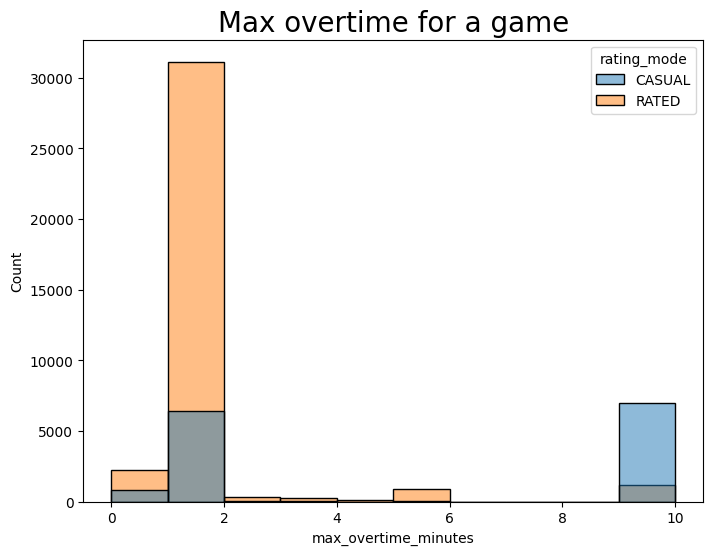

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.histplot(data=full_train, x="max_overtime_minutes",hue= "rating_mode", binwidth= 1)
ax.set_title('Max overtime for a game', fontsize=20)
plt.show()

Most RATED games end with 1 max overtime minute but CASUAL games can take 1,2 or 10.

# Checking out the `lexicon`

In [55]:
x, y = np.unique(full_train["lexicon"], return_counts=True)

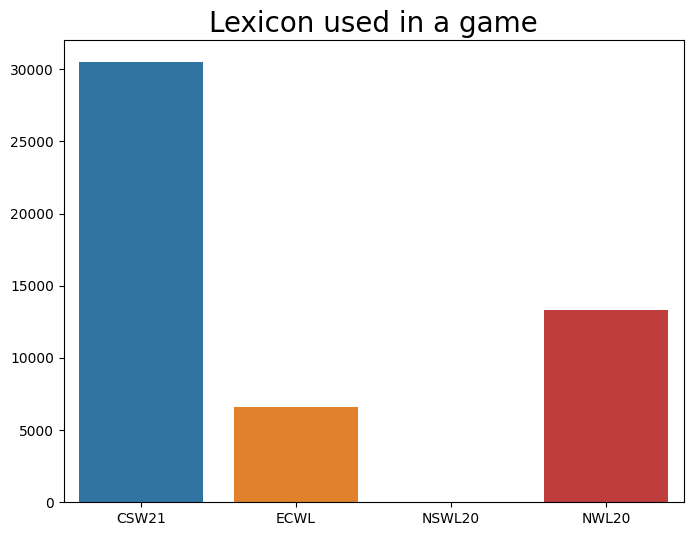

In [56]:
fig,ax = plt.subplots(figsize = (8,6))

ax = sns.barplot(x = x, y = y)
ax.set_title('Lexicon used in a game', fontsize=20)
plt.show()


We are supposed to have 3 Lexicon "CSW19", "NWL20", "CSW21" so "NSWL20" is clearly an anamoly. It is probably a typ and should be NWL20, so we will convert it to NWL20.

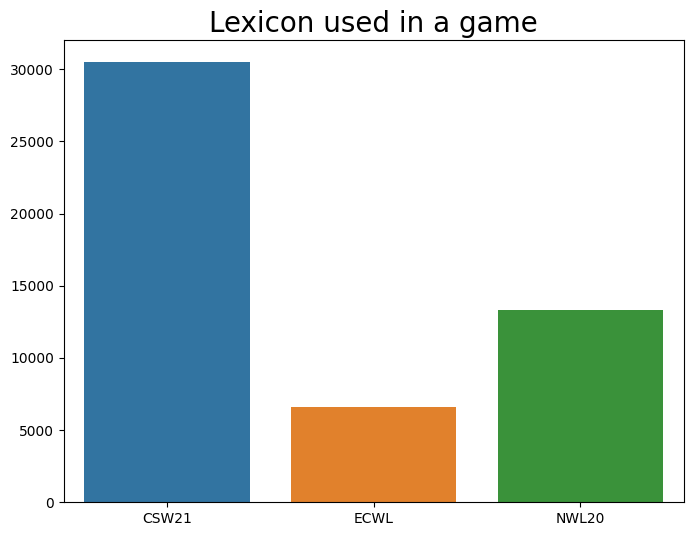

In [57]:
full_train["lexicon"] = full_train["lexicon"].apply(lambda x: "NWL20" if x == "NSWL20" else x)

x, y = np.unique(full_train["lexicon"], return_counts=True)

fig,ax = plt.subplots(figsize = (8,6))

ax = sns.barplot(x = x, y = y)
ax.set_title('Lexicon used in a game', fontsize=20)
plt.show()


## Checking the same for `game_end_reason`

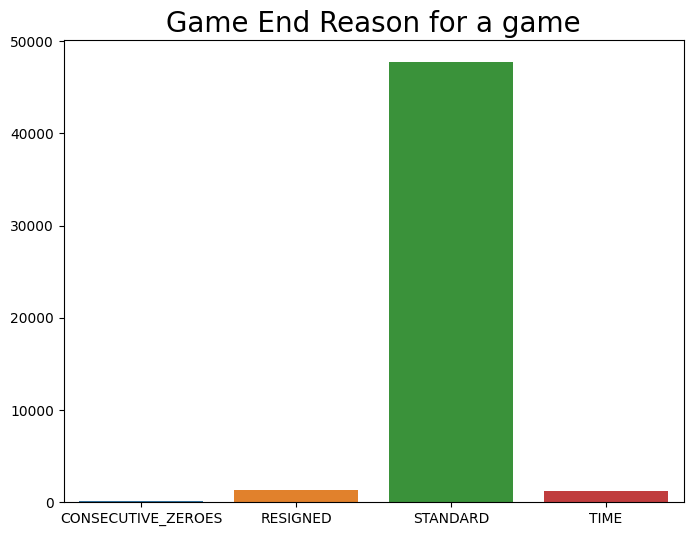

In [58]:
x, y = np.unique(full_train["game_end_reason"], return_counts=True)


fig,ax = plt.subplots(figsize = (8,6))

ax = sns.barplot(x = x, y = y)
ax.set_title('Game End Reason for a game', fontsize=20)
plt.show()


Now cheking time control name

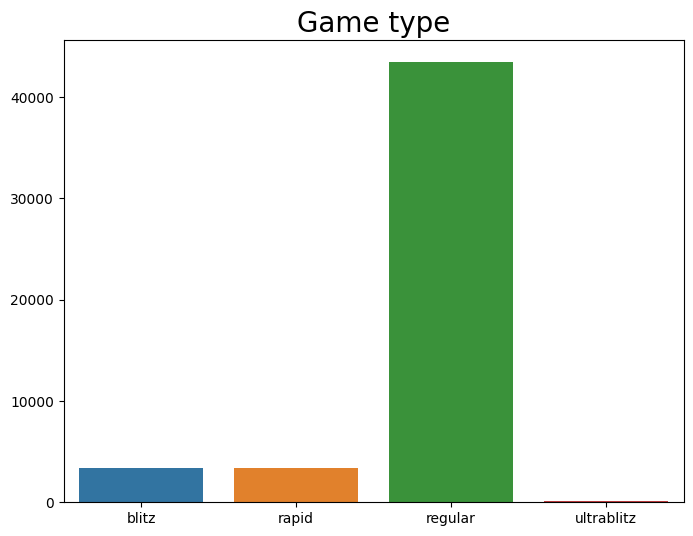

In [59]:
x, y = np.unique(full_train["time_control_name"], return_counts=True)


fig,ax = plt.subplots(figsize = (8,6))

ax = sns.barplot(x = x, y = y)
ax.set_title('Game type', fontsize=20)
plt.show()


ultrablitz looks really small value

In [60]:
x,y


(array(['blitz', 'rapid', 'regular', 'ultrablitz'], dtype=object),
 array([ 3392,  3406, 43450,   162], dtype=int64))

We might need it to merge it with blitz

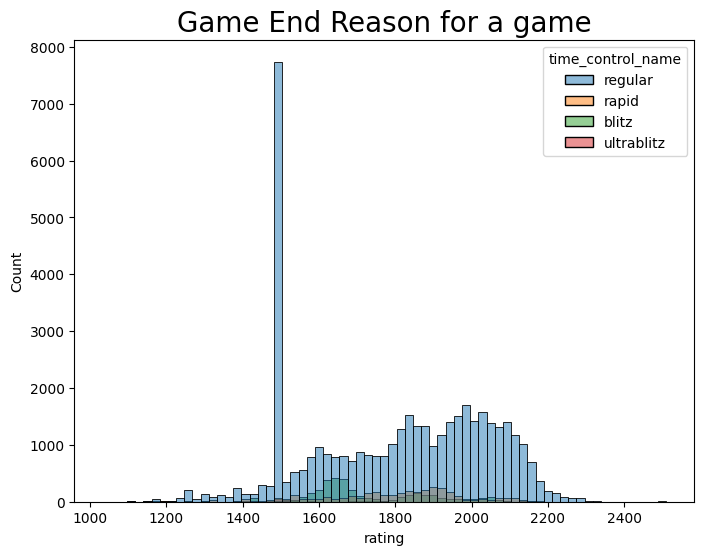

In [61]:
fig,ax = plt.subplots(figsize = (8,6))

ax = sns.histplot(data = full_train, x = "rating", hue = "time_control_name")
ax.set_title('Game End Reason for a game', fontsize=20)
plt.show()


There seem to be a huge spike in rating with most players having that rating.

Now that we have worked on the games.csv file, next we need to see which features from turns.csv we could add

## turns.csv 

In [62]:
turns_data = get_data('main_data', 'turns.csv')
turns_data.head(28)

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play
5,1,6,stevy,EEOORSX,M11,OXO,31,65,Play
6,1,7,BetterBot,AAEJRSU,5E,RAJAS,29,83,Play
7,1,8,stevy,AEEFIRS,9B,FAERIES,72,137,Play
8,1,9,BetterBot,ELNNORU,C3,NEURON.L,68,151,Play
9,1,10,stevy,EEEHIKO,6F,HO,35,172,Play


This is a bit more complicated to merge with the train_data than games_data!

Checking the dataset we have so far:

In [63]:
full_train.head()

,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,game_created_time,game_created_day
0,1,stevy,429,BetterBot,335,1637,1500,1,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,3.646944,4
1,3,davidavid,440,BetterBot,318,2071,1811,1,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,19.333056,2
2,4,Inandoutworker,119,BetterBot,478,1936,1473,1,regular,RESIGNED,0,CSW21,3600,0,CASUAL,1,350.861141,8.074167,6
3,5,stevy,325,STEEBot,427,1844,1500,1,regular,STANDARD,0,NWL20,1200,0,CASUAL,1,642.688722,2.605278,0
4,6,HivinD,378,STEEBot,427,2143,2029,0,regular,STANDARD,0,CSW21,900,0,RATED,1,426.950541,4.526667,1


Let us group the data by players and game_id to sumarize their gameplay:

In [64]:
temp = turns_data.groupby(['game_id','nickname'])['points'].agg([np.mean, np.median, np.std]).reset_index()

temp.head()

,game_id,nickname,mean,median,std
0,1,BetterBot,25.769231,24.0,16.457794
1,1,stevy,30.642857,25.0,25.490895
2,2,BetterBot,33.416667,23.0,25.564387
3,2,Super,34.857143,29.0,30.866604
4,3,BetterBot,24.461538,22.0,18.058310


We already have the total score and points so all we donot need it here. 

`location` feature is NA for test set so we can drop it

We can include the total number of turns it took for the game to end

In [65]:
total_turns = turns_data.groupby(['game_id'])['turn_number'].max()

total_turns

game_id
1        27
2        26
3        27
4        29
5        31
         ..
72769    31
72770    32
72771    31
72772    30
72773    26
Name: turn_number, Length: 72773, dtype: int64

In [66]:
turn_type = turns_data.groupby(['game_id','nickname'])['turn_type'].unique().reset_index()

turn_type.head()

,game_id,nickname,turn_type
0,1,BetterBot,[Play]
1,1,stevy,"[Play, End]"
2,2,BetterBot,[Play]
3,2,Super,"[Play, Exchange, Pass, End]"
4,3,BetterBot,"[Exchange, Play]"


In [67]:
turns_data.groupby(['game_id','nickname','turn_type'])['move'].count().reset_index()

,game_id,nickname,turn_type,move
0,1,BetterBot,Play,13
1,1,stevy,End,1
2,1,stevy,Play,13
3,2,BetterBot,Play,12
4,2,Super,End,1
...,...,...,...,...
257893,72772,Gtowngrad,End,1
257894,72772,Gtowngrad,Play,15
257895,72773,HastyBot,End,1
257896,72773,HastyBot,Play,13


In [68]:
turn_type.loc[turn_type['nickname'].isin(bot_names)]

,game_id,nickname,turn_type
0,1,BetterBot,[Play]
2,2,BetterBot,[Play]
4,3,BetterBot,"[Exchange, Play]"
6,4,BetterBot,[Play]
8,5,STEEBot,[Play]
...,...,...,...
145536,72769,STEEBot,[Play]
145538,72770,HastyBot,[Play]
145541,72771,HastyBot,"[Play, Exchange]"
145542,72772,BetterBot,[Play]


In [69]:
bot_data = turn_type.loc[turn_type['nickname'].isin(bot_names)].copy()
bot_data.rename(columns={'nickname':'bot_nickname', 'turn_type': 'bot_turn_type'}, inplace= True )

human_data = turn_type.loc[~turn_type['nickname'].isin(bot_names)].copy()
        
# Join the two dataframe
new_df = human_data.join(bot_data.set_index('game_id'), on='game_id')

new_df.head()

,game_id,nickname,turn_type,bot_nickname,bot_turn_type
1,1,stevy,"[Play, End]",BetterBot,[Play]
3,2,Super,"[Play, Exchange, Pass, End]",BetterBot,[Play]
5,3,davidavid,"[Play, End]",BetterBot,"[Exchange, Play]"
7,4,Inandoutworker,"[Play, Exchange]",BetterBot,[Play]
9,5,stevy,"[Play, Exchange, End]",STEEBot,[Play]


In [70]:
new_df.shape

(72773, 5)

In [71]:
temp.head()

,game_id,nickname,mean,median,std
0,1,BetterBot,25.769231,24.0,16.457794
1,1,stevy,30.642857,25.0,25.490895
2,2,BetterBot,33.416667,23.0,25.564387
3,2,Super,34.857143,29.0,30.866604
4,3,BetterBot,24.461538,22.0,18.058310


In [72]:
bot_data = temp.loc[temp['nickname'].isin(bot_names)].copy()
bot_data.rename(columns={'nickname':'bot_nickname', 'mean': 'bot_mean', 'median': 'bot_median', 'std': 'bot_std'}, inplace= True )

human_data = temp.loc[~temp['nickname'].isin(bot_names)].copy()
        
# Join the two dataframe
temp_df = human_data.join(bot_data.set_index('game_id'), on='game_id')

temp_df.head()

,game_id,nickname,mean,median,std,bot_nickname,bot_mean,bot_median,bot_std
1,1,stevy,30.642857,25.0,25.490895,BetterBot,25.769231,24.0,16.457794
3,2,Super,34.857143,29.0,30.866604,BetterBot,33.416667,23.0,25.564387
5,3,davidavid,31.428571,28.0,21.689112,BetterBot,24.461538,22.0,18.058310
7,4,Inandoutworker,8.500000,5.5,8.600089,BetterBot,31.866667,24.0,20.945053
9,5,stevy,20.312500,20.5,12.445715,STEEBot,28.466667,21.0,20.346522


In [73]:
temp_df.shape

(72773, 9)

now that we have the two dataframes we can just combine them again

In [74]:
full_df = pd.merge(temp_df, new_df, on=['game_id', 'nickname', 'bot_nickname'])

full_df.head()

,game_id,nickname,mean,median,std,bot_nickname,bot_mean,bot_median,bot_std,turn_type,bot_turn_type
0,1,stevy,30.642857,25.0,25.490895,BetterBot,25.769231,24.0,16.457794,"[Play, End]",[Play]
1,2,Super,34.857143,29.0,30.866604,BetterBot,33.416667,23.0,25.564387,"[Play, Exchange, Pass, End]",[Play]
2,3,davidavid,31.428571,28.0,21.689112,BetterBot,24.461538,22.0,18.058310,"[Play, End]","[Exchange, Play]"
3,4,Inandoutworker,8.500000,5.5,8.600089,BetterBot,31.866667,24.0,20.945053,"[Play, Exchange]",[Play]
4,5,stevy,20.312500,20.5,12.445715,STEEBot,28.466667,21.0,20.346522,"[Play, Exchange, End]",[Play]


In [75]:
full_df.shape

(72773, 11)

we need to add the total_turn column now

In [76]:
full_df = pd.merge(full_df, total_turns.reset_index(), on='game_id')

full_df.head()

,game_id,nickname,mean,median,std,bot_nickname,bot_mean,bot_median,bot_std,turn_type,bot_turn_type,turn_number
0,1,stevy,30.642857,25.0,25.490895,BetterBot,25.769231,24.0,16.457794,"[Play, End]",[Play],27
1,2,Super,34.857143,29.0,30.866604,BetterBot,33.416667,23.0,25.564387,"[Play, Exchange, Pass, End]",[Play],26
2,3,davidavid,31.428571,28.0,21.689112,BetterBot,24.461538,22.0,18.058310,"[Play, End]","[Exchange, Play]",27
3,4,Inandoutworker,8.500000,5.5,8.600089,BetterBot,31.866667,24.0,20.945053,"[Play, Exchange]",[Play],29
4,5,stevy,20.312500,20.5,12.445715,STEEBot,28.466667,21.0,20.346522,"[Play, Exchange, End]",[Play],31


Play and end is common for all games, so I will try to isolate the more uncommon moves

In [77]:
full_df["Player_Exchanged"] = full_df["turn_type"].apply(lambda x: 1 if "Exchange" in x else 0)
full_df["Player_Passed"] = full_df["turn_type"].apply(lambda x: 1 if "Pass" in x else 0)
full_df["Player_Six_Rule"] = full_df["turn_type"].apply(lambda x: 1 if "Six-Zero Rule" in x else 0)
full_df["Player_Challenged"] = full_df["turn_type"].apply(lambda x: 1 if "Challenge" in x else 0)


full_df["Bot_Exchanged"] = full_df["bot_turn_type"].apply(lambda x: 1 if "Exchange" in x else 0)
full_df["Bot_Passed"] = full_df["bot_turn_type"].apply(lambda x: 1 if "Pass" in x else 0)
full_df["Bot_Six_Rule"] = full_df["bot_turn_type"].apply(lambda x: 1 if "Six-Zero Rule" in x else 0)
full_df["Bot_Challenged"] = full_df["bot_turn_type"].apply(lambda x: 1 if "Challenge" in x else 0)

full_df.drop(columns=['turn_type', 'bot_turn_type'], inplace= True)

full_df.head()


,game_id,nickname,mean,median,std,bot_nickname,bot_mean,bot_median,bot_std,turn_number,Player_Exchanged,Player_Passed,Player_Six_Rule,Player_Challenged,Bot_Exchanged,Bot_Passed,Bot_Six_Rule,Bot_Challenged
0,1,stevy,30.642857,25.0,25.490895,BetterBot,25.769231,24.0,16.457794,27,0,0,0,0,0,0,0,0
1,2,Super,34.857143,29.0,30.866604,BetterBot,33.416667,23.0,25.564387,26,1,1,0,0,0,0,0,0
2,3,davidavid,31.428571,28.0,21.689112,BetterBot,24.461538,22.0,18.058310,27,0,0,0,0,1,0,0,0
3,4,Inandoutworker,8.500000,5.5,8.600089,BetterBot,31.866667,24.0,20.945053,29,1,0,0,0,0,0,0,0
4,5,stevy,20.312500,20.5,12.445715,STEEBot,28.466667,21.0,20.346522,31,1,0,0,0,0,0,0,0


In [78]:
full_df.shape

(72773, 18)

In [79]:
full_train.shape

(50410, 19)

## Merging training data and turns_data

In [80]:
final_df = pd.merge(full_train, full_df, on=['game_id', 'nickname', 'bot_nickname'])

final_df.head()

,game_id,nickname,score,bot_nickname,bot_score,bot_rating,rating,first,time_control_name,game_end_reason,...,bot_std,turn_number,Player_Exchanged,Player_Passed,Player_Six_Rule,Player_Challenged,Bot_Exchanged,Bot_Passed,Bot_Six_Rule,Bot_Challenged
0,1,stevy,429,BetterBot,335,1637,1500,1,regular,STANDARD,...,16.457794,27,0,0,0,0,0,0,0,0
1,3,davidavid,440,BetterBot,318,2071,1811,1,regular,STANDARD,...,18.058310,27,0,0,0,0,1,0,0,0
2,4,Inandoutworker,119,BetterBot,478,1936,1473,1,regular,RESIGNED,...,20.945053,29,1,0,0,0,0,0,0,0
3,5,stevy,325,STEEBot,427,1844,1500,1,regular,STANDARD,...,20.346522,31,1,0,0,0,0,0,0,0
4,6,HivinD,378,STEEBot,427,2143,2029,0,regular,STANDARD,...,23.572039,25,0,0,0,0,1,0,0,0


In [81]:
final_df.shape

(50410, 34)

## Save the training set for later use

In [82]:
final_df.to_csv('..\\data\\processed_data\\full_train.csv.csv', index=False)